In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
## understanding the data
## train_proteins data
##train_peptide data
## train_clinical_data'
## supplemental_clinical_data



In [3]:
###train proteins data
train_proteins = pd.read_csv(r"C:\Users\sushm\amp\train_proteins.csv")
train_proteins.head(5)


,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0


In [4]:
train_proteins.shape

(232741, 5)

In [5]:
train_proteins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232741 entries, 0 to 232740
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   visit_id     232741 non-null  object 
 1   visit_month  232741 non-null  int64  
 2   patient_id   232741 non-null  int64  
 3   UniProt      232741 non-null  object 
 4   NPX          232741 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 8.9+ MB


In [6]:
train_proteins['patient_id'].nunique()

248

In [7]:
train_proteins['visit_month'].unique()

array([  0,   3,   6,  12,  18,  24,  30,  36,  48,  54,  60,  72,  84,
        96, 108], dtype=int64)

In [8]:
train_proteins['UniProt'].nunique()

227

In [9]:
train_proteins['visit_month'].value_counts()

0      40587
12     37467
24     36225
36     31156
48     28838
6      25991
60     17572
84      6288
72      4407
18      1657
108      855
3        641
96       423
54       418
30       216
Name: visit_month, dtype: int64

O00391


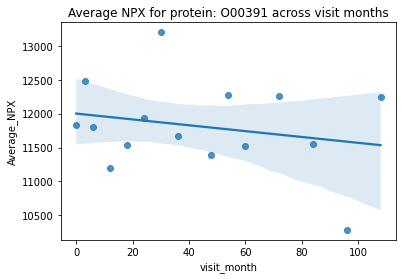

O00533


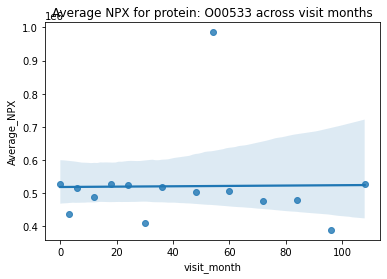

O00584


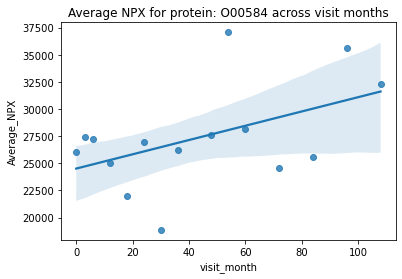

O14498


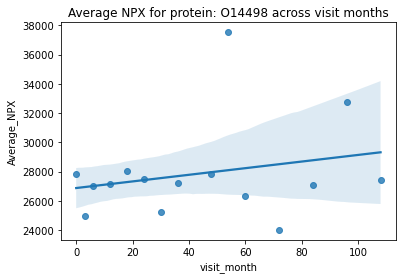

O14773


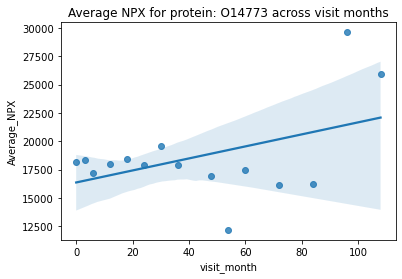

O14791


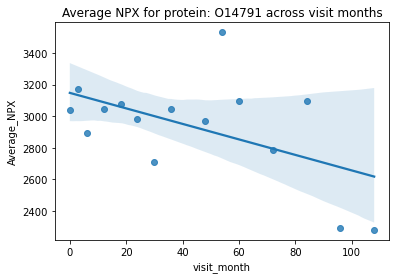

O15240


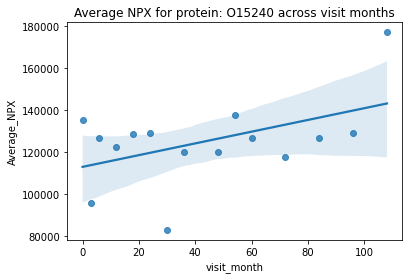

O15394


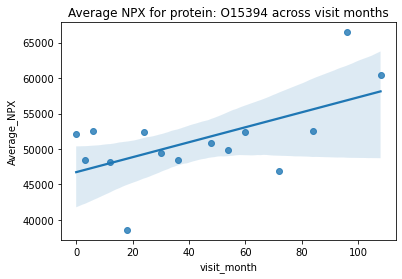

O43505


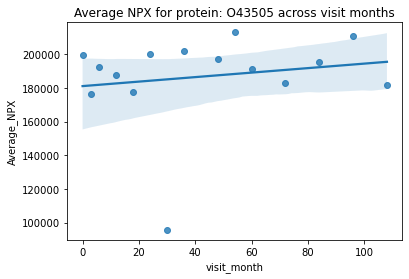

O60888


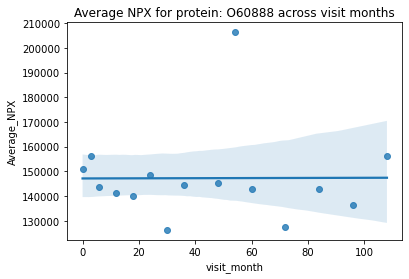

In [14]:
for prot in train_proteins['UniProt'].unique()[:10]:
    df = train_proteins[train_proteins['UniProt'] == prot]
    df_1 = df.groupby('visit_month')['NPX'].mean().reset_index()
    df_1.columns = ['visit_month', 'Average_NPX']
    print(prot)
    sns.regplot(data = df_1, x = 'visit_month', y = 'Average_NPX')
    plt.title('Average NPX for protein: {} across visit months'.format(prot))
    plt.show()

In [15]:
#### train peptide data
train_peptides = pd.read_csv(r"C:\Users\sushm\amp\train_peptides.csv")
train_peptides.head(5)

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.7


In [16]:
train_peptides.shape

(981834, 6)

In [17]:
train_peptides.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981834 entries, 0 to 981833
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   visit_id          981834 non-null  object 
 1   visit_month       981834 non-null  int64  
 2   patient_id        981834 non-null  int64  
 3   UniProt           981834 non-null  object 
 4   Peptide           981834 non-null  object 
 5   PeptideAbundance  981834 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 44.9+ MB


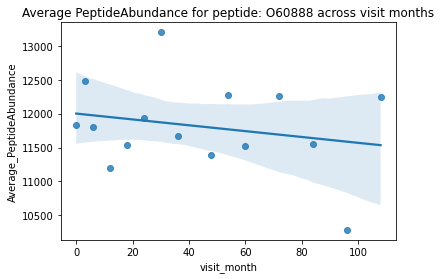

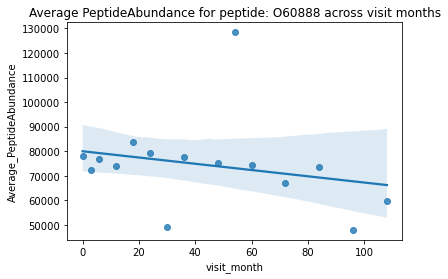

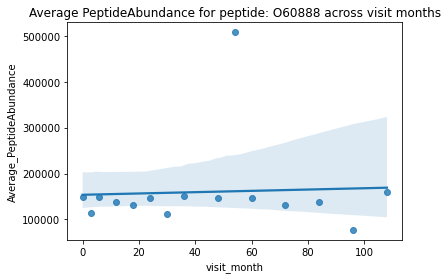

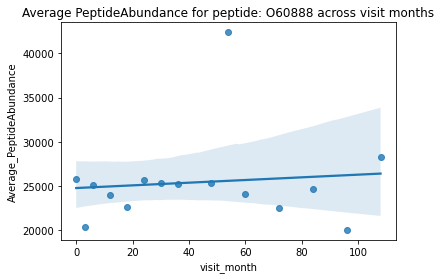

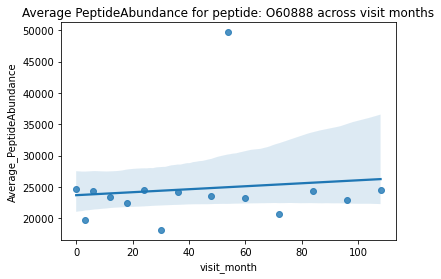

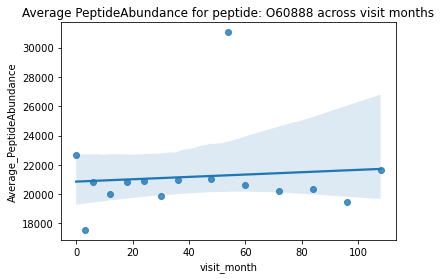

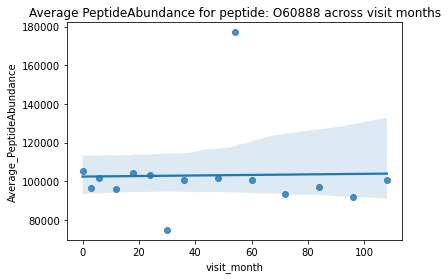

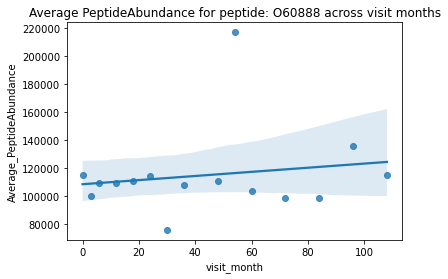

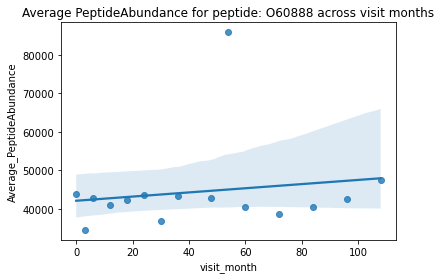

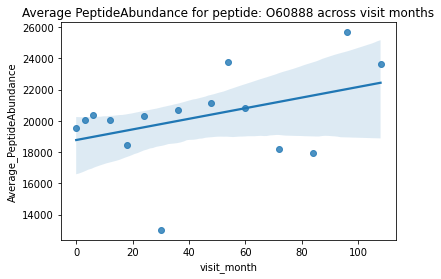

In [18]:
for peptide in train_peptides['Peptide'].unique()[:10]:
    df = train_peptides[train_peptides['Peptide'] == peptide]
    df_1 = df.groupby('visit_month')['PeptideAbundance'].mean().reset_index()
    df_1.columns = ['visit_month', 'Average_PeptideAbundance']
    sns.regplot(data = df_1, x = 'visit_month', y = 'Average_PeptideAbundance')
    plt.title('Average PeptideAbundance for peptide: {} across visit months'.format(prot))
    plt.show()

In [19]:
#### understanding train clinical data
train_clinical_data = pd.read_csv(r"C:\Users\sushm\amp\train_clinical_data.csv")
train_clinical_data.head(5)


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On


In [20]:
train_clinical_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2615 entries, 0 to 2614
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   visit_id                             2615 non-null   object 
 1   patient_id                           2615 non-null   int64  
 2   visit_month                          2615 non-null   int64  
 3   updrs_1                              2614 non-null   float64
 4   updrs_2                              2613 non-null   float64
 5   updrs_3                              2590 non-null   float64
 6   updrs_4                              1577 non-null   float64
 7   upd23b_clinical_state_on_medication  1288 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 163.6+ KB


In [21]:
train_clinical_data['upd23b_clinical_state_on_medication'].value_counts()


On     775
Off    513
Name: upd23b_clinical_state_on_medication, dtype: int64

In [22]:
##updrs 1=mental test
#updrs 2=daily living activity test
#updrs 3 =motor function test
## updrs 4==motor function complications


month_updrs=train_clinical_data.drop('patient_id',axis=1).groupby('visit_month').mean().reset_index()
month_updrs

,visit_month,updrs_1,updrs_2,updrs_3,updrs_4
0,0,5.572581,4.439516,13.754032,2.047619
1,3,5.513043,6.634783,20.482456,0.142857
2,6,7.109375,6.963542,20.272251,2.307692
3,9,6.080808,7.204082,20.474747,0.488372
4,12,6.222222,5.320988,16.165975,1.308271
5,18,7.299465,6.866310,19.016216,1.218978
6,24,6.670782,5.658436,16.489540,1.658065
7,30,8.231214,7.647399,21.710983,1.753425
8,36,7.331858,6.230088,18.316964,1.765432
9,42,8.339869,8.372549,22.720779,1.868613


<AxesSubplot:xlabel='visit_month', ylabel='updrs_4'>

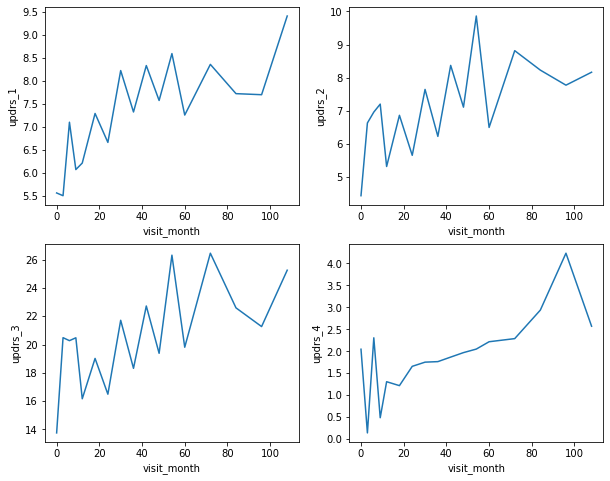

In [23]:
plt.rcParams.update({'figure.figsize':[10,8]})
fig, ax = plt.subplots(ncols=2, nrows=2)
sns.lineplot(data = month_updrs, x='visit_month', y='updrs_1', ax=ax[0,0])
sns.lineplot(data = month_updrs, x='visit_month', y='updrs_2', ax=ax[0,1])
sns.lineplot(data = month_updrs, x='visit_month', y='updrs_3', ax=ax[1,0])
sns.lineplot(data = month_updrs, x='visit_month', y='updrs_4', ax=ax[1,1])

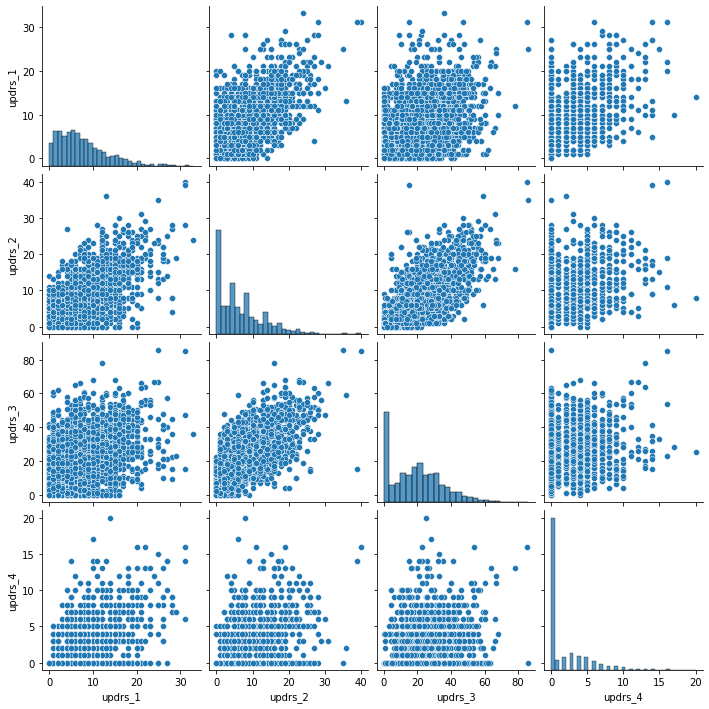

In [24]:
sns.pairplot(train_clinical_data[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']])

In [25]:
train_clinical_data[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']].corr()

,updrs_1,updrs_2,updrs_3,updrs_4
updrs_1,1.000000,0.661802,0.434569,0.432620
updrs_2,0.661802,1.000000,0.735106,0.383866
updrs_3,0.434569,0.735106,1.000000,0.221593
updrs_4,0.432620,0.383866,0.221593,1.000000


In [26]:
## understanding supplemental clinicla data
supplemental_clinical_data = pd.read_csv(r"C:\Users\sushm\amp\supplemental_clinical_data.csv")
supplemental_clinical_data.shape


(2223, 8)

In [27]:
supplemental_clinical_data.head(5)

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,35_0,35,0,5.0,3.0,16.0,0.0,NaN
1,35_36,35,36,6.0,4.0,20.0,0.0,NaN
2,75_0,75,0,4.0,6.0,26.0,0.0,NaN
3,75_36,75,36,1.0,8.0,38.0,0.0,On
4,155_0,155,0,NaN,NaN,0.0,NaN,NaN


Merging the datasets



In [28]:
train_data = pd.merge(train_peptides, train_proteins, how = 'left', 
                                   on=['visit_id', 'visit_month', 'patient_id', 'UniProt'])   
train_data.head(10)

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance,NPX
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0,732430.0
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0,732430.0
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9,732430.0
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.7,732430.0
5,55_0,0,55,O00533,TLKIENVSYQDKGNYR,23216.5,732430.0
6,55_0,0,55,O00533,VIAVNEVGR,170878.0,732430.0
7,55_0,0,55,O00533,VMTPAVYAPYDVK,148771.0,732430.0
8,55_0,0,55,O00533,VNGSPVDNHPFAGDVVFPR,55202.1,732430.0
9,55_0,0,55,O00584,ELDLNSVLLK,27229.3,39585.8


In [25]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 981834 entries, 0 to 981833
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   visit_id          981834 non-null  object 
 1   visit_month       981834 non-null  int64  
 2   patient_id        981834 non-null  int64  
 3   UniProt           981834 non-null  object 
 4   Peptide           981834 non-null  object 
 5   PeptideAbundance  981834 non-null  float64
 6   NPX               981834 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 59.9+ MB


In [29]:
train_data.isna().sum()

visit_id            0
visit_month         0
patient_id          0
UniProt             0
Peptide             0
PeptideAbundance    0
NPX                 0
dtype: int64

In [30]:
train_data = pd.merge(train_data, train_clinical_data, on=['visit_id','visit_month', 'patient_id'], how='left')

In [31]:
train_data.head(5)


,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance,NPX,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3,11254.3,10.0,6.0,15.0,NaN,NaN
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0,732430.0,10.0,6.0,15.0,NaN,NaN
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0,732430.0,10.0,6.0,15.0,NaN,NaN
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9,732430.0,10.0,6.0,15.0,NaN,NaN
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.7,732430.0,10.0,6.0,15.0,NaN,NaN


In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981834 entries, 0 to 981833
Data columns (total 12 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   visit_id                             981834 non-null  object 
 1   visit_month                          981834 non-null  int64  
 2   patient_id                           981834 non-null  int64  
 3   UniProt                              981834 non-null  object 
 4   Peptide                              981834 non-null  object 
 5   PeptideAbundance                     981834 non-null  float64
 6   NPX                                  981834 non-null  float64
 7   updrs_1                              941744 non-null  float64
 8   updrs_2                              941744 non-null  float64
 9   updrs_3                              932624 non-null  float64
 10  updrs_4                              495530 non-null  float64
 11  upd23b_clinic

In [33]:
train_data.isna().sum()


visit_id                                    0
visit_month                                 0
patient_id                                  0
UniProt                                     0
Peptide                                     0
PeptideAbundance                            0
NPX                                         0
updrs_1                                 40090
updrs_2                                 40090
updrs_3                                 49210
updrs_4                                486304
upd23b_clinical_state_on_medication    590109
dtype: int64

In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
numeric = ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']

imputer.fit(train_data[numeric])

train_data[numeric] = imputer.transform(train_data[numeric])
train_data = train_data.dropna(axis=0)

In [35]:
train_data.isna().sum()

visit_id                               0
visit_month                            0
patient_id                             0
UniProt                                0
Peptide                                0
PeptideAbundance                       0
NPX                                    0
updrs_1                                0
updrs_2                                0
updrs_3                                0
updrs_4                                0
upd23b_clinical_state_on_medication    0
dtype: int64

In [36]:
updrs_month=train_data.drop('patient_id',axis=1).groupby('visit_month').mean()
updrs_month

,PeptideAbundance,NPX,updrs_1,updrs_2,updrs_3,updrs_4
visit_month,,,,,,
0,679136.103023,1.772405e+07,8.907992,7.584838,22.738790,2.792399
6,566978.888368,1.388570e+07,0.000000,10.000000,31.000000,1.887924
12,638128.627155,1.664473e+07,8.723524,9.200653,24.393112,2.010786
18,624690.078225,1.556862e+07,4.852182,4.960049,10.429318,0.255378
24,645968.254831,1.696057e+07,9.323471,9.012802,24.993517,2.337802
30,654303.349547,1.713977e+07,14.000000,15.000000,29.000000,2.000000
36,642130.106535,1.687808e+07,9.669893,9.083733,25.947144,2.203090
48,658207.146428,1.733273e+07,9.077586,9.795865,28.707604,2.384754
54,610848.796860,1.683095e+07,6.000000,12.000000,21.000000,0.000000


<AxesSubplot:xlabel='visit_month', ylabel='updrs_4'>

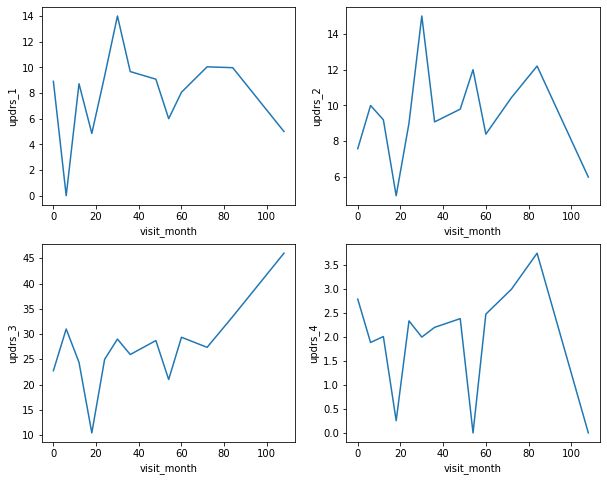

In [34]:
plt.rcParams.update({'figure.figsize':[10,8]})
fig, ax = plt.subplots(ncols=2, nrows=2)
sns.lineplot(data = updrs_month, x='visit_month', y='updrs_1', ax=ax[0,0])
sns.lineplot(data = updrs_month, x='visit_month', y='updrs_2', ax=ax[0,1])
sns.lineplot(data = updrs_month, x='visit_month', y='updrs_3', ax=ax[1,0])
sns.lineplot(data = updrs_month, x='visit_month', y='updrs_4', ax=ax[1,1])

<AxesSubplot:xlabel='PeptideAbundance', ylabel='updrs_4'>

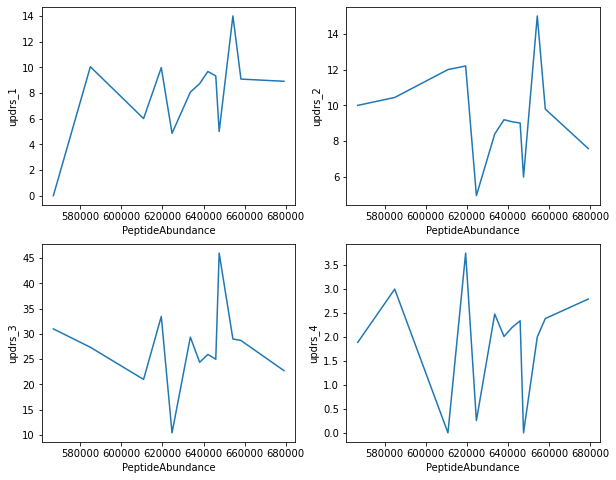

In [37]:
plt.rcParams.update({'figure.figsize':[10,8]})
fig, ax = plt.subplots(ncols=2, nrows=2)
sns.lineplot(data = updrs_month, x='PeptideAbundance', y='updrs_1', ax=ax[0,0])
sns.lineplot(data = updrs_month, x='PeptideAbundance', y='updrs_2', ax=ax[0,1])
sns.lineplot(data = updrs_month, x='PeptideAbundance', y='updrs_3', ax=ax[1,0])
sns.lineplot(data = updrs_month, x='PeptideAbundance', y='updrs_4', ax=ax[1,1])

<AxesSubplot:xlabel='NPX', ylabel='updrs_4'>

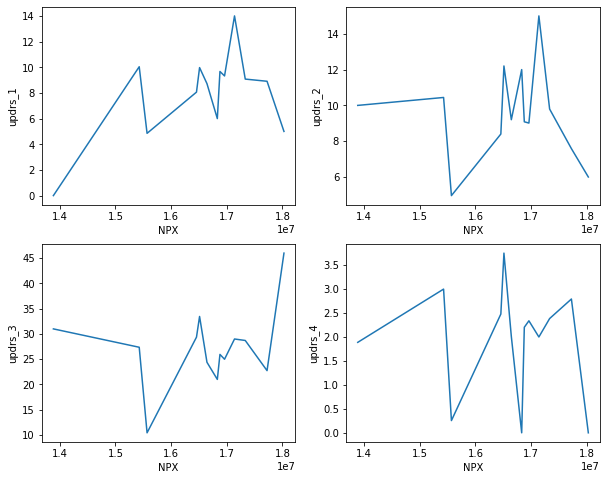

In [38]:
plt.rcParams.update({'figure.figsize':[10,8]})
fig, ax = plt.subplots(ncols=2, nrows=2)
sns.lineplot(data = updrs_month, x='NPX', y='updrs_1', ax=ax[0,0])
sns.lineplot(data = updrs_month, x='NPX', y='updrs_2', ax=ax[0,1])
sns.lineplot(data = updrs_month, x='NPX', y='updrs_3', ax=ax[1,0])
sns.lineplot(data = updrs_month, x='NPX', y='updrs_4', ax=ax[1,1])

In [35]:
#### Model building


In [48]:

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391725 entries, 931 to 980925
Data columns (total 12 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   visit_id                             391725 non-null  object 
 1   visit_month                          391725 non-null  int64  
 2   patient_id                           391725 non-null  int64  
 3   UniProt                              391725 non-null  object 
 4   Peptide                              391725 non-null  object 
 5   PeptideAbundance                     391725 non-null  float64
 6   NPX                                  391725 non-null  float64
 7   updrs_1                              391725 non-null  float64
 8   updrs_2                              391725 non-null  float64
 9   updrs_3                              391725 non-null  float64
 10  updrs_4                              391725 non-null  float64
 11  upd23b_clin

In [49]:
train_data.head(10)

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance,NPX,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
931,1517_0,0,1517,O00391,NEQEQPLGQWHLS,11648.9,11648.9,11.0,6.0,25.0,5.0,On
932,1517_0,0,1517,O00533,GNPEPTFSWTK,63593.4,419015.0,11.0,6.0,25.0,5.0,On
933,1517_0,0,1517,O00533,IEIPSSVQQVPTIIK,99566.6,419015.0,11.0,6.0,25.0,5.0,On
934,1517_0,0,1517,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,16351.0,419015.0,11.0,6.0,25.0,5.0,On
935,1517_0,0,1517,O00533,SMEQNGPGLEYR,15566.0,419015.0,11.0,6.0,25.0,5.0,On
936,1517_0,0,1517,O00533,VIAVNEVGR,81148.1,419015.0,11.0,6.0,25.0,5.0,On
937,1517_0,0,1517,O00533,VMTPAVYAPYDVK,110232.0,419015.0,11.0,6.0,25.0,5.0,On
938,1517_0,0,1517,O00533,VNGSPVDNHPFAGDVVFPR,32558.1,419015.0,11.0,6.0,25.0,5.0,On
939,1517_0,0,1517,O00584,ELDLNSVLLK,21742.4,35053.8,11.0,6.0,25.0,5.0,On
940,1517_0,0,1517,O00584,HGTC(UniMod_4)AAQVDALNSQKK,13311.5,35053.8,11.0,6.0,25.0,5.0,On


In [50]:
from sklearn.preprocessing import LabelEncoder
label_cols=["visit_id","UniProt","Peptide","upd23b_clinical_state_on_medication"]
def label_encoder(train_data,columns):
    for col in columns:
        train_data[col]=train_data[col].astype(str)
        train_data[col]=LabelEncoder().fit_transform(train_data[col])
    return train_data
train_data1=label_encoder(train_data,label_cols)
train_data1

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance,NPX,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
931,52,0,1517,0,592,11648.9,11648.9,11.0,6.0,25.0,5.0,1
932,52,0,1517,1,301,63593.4,419015.0,11.0,6.0,25.0,5.0,1
933,52,0,1517,1,364,99566.6,419015.0,11.0,6.0,25.0,5.0,1
934,52,0,1517,1,433,16351.0,419015.0,11.0,6.0,25.0,5.0,1
935,52,0,1517,1,744,15566.0,419015.0,11.0,6.0,25.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
980921,327,108,55096,222,279,33929.8,123192.0,5.0,6.0,46.0,0.0,0
980922,327,108,55096,222,375,68513.3,123192.0,5.0,6.0,46.0,0.0,0
980923,327,108,55096,223,723,101061.0,101061.0,5.0,6.0,46.0,0.0,0
980924,327,108,55096,224,430,18108.9,18108.9,5.0,6.0,46.0,0.0,0


In [51]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391725 entries, 931 to 980925
Data columns (total 12 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   visit_id                             391725 non-null  int32  
 1   visit_month                          391725 non-null  int64  
 2   patient_id                           391725 non-null  int64  
 3   UniProt                              391725 non-null  int32  
 4   Peptide                              391725 non-null  int32  
 5   PeptideAbundance                     391725 non-null  float64
 6   NPX                                  391725 non-null  float64
 7   updrs_1                              391725 non-null  float64
 8   updrs_2                              391725 non-null  float64
 9   updrs_3                              391725 non-null  float64
 10  updrs_4                              391725 non-null  float64
 11  upd23b_clin

In [52]:
#######Model Building


In [53]:
y=train_data['updrs_1']
X=train_data.drop('updrs_1',axis=1)
y.shape








(391725,)

In [54]:
X.shape

(391725, 11)

In [55]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.predict(X_train)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(lr.predict(X_train),y_train)

2.2466538380087213

In [60]:
y_test_pred = lr.predict(X_test)



In [64]:
import sklearn.metrics as sm
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Regressor model performance:
Mean absolute error(MAE) = 2.23
Mean squared error(MSE) = 8.32
Median absolute error = 1.8
R2 score = 0.2


In [56]:
y=train_data['updrs_2']
X=train_data.drop('updrs_2',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.predict(X_train)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(lr.predict(X_train),y_train)



2.990754075884333

In [57]:
y=train_data['updrs_3']
X=train_data.drop('updrs_3',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.predict(X_train)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(lr.predict(X_train),y_train)

7.909889728066089

In [58]:
y=train_data['updrs_4']
X=train_data.drop('updrs_4',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.predict(X_train)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(lr.predict(X_train),y_train)

2.2421643290523425

In [ ]:
##### Deployment

In [ ]:
####save the model


In [67]:
import pickle
filename='updrs4.pk1'
pickle.dump(lr,open(filename,'wb'))


In [68]:
##load the model from disk
loaded_model=pickle.load(open(filename,'rb'))
result=loaded_model.score(X_test,y_test)
print(result)

0.19587153551673986


In [ ]:
####code for Deployment
# app = Flask(__name__)
app=Flask(__name__,template_folder='templates')
modelrisk  = pickle.load(open(r""C:\Users\sushm\updrs4.pk1", 'rb'))
modelriskrf  = pickle.load(open(r""C:\Users\sushm\updrs4.pk1", 'rb'))


@app.route('/')
def index():
    return render_template("index.html")


@app.route('/predict', methods=['GET', 'POST'])
def predict():
    val1 = request.form['PeptideAbundance ']
    val2 = request.form['NPX']

    arr = np.array([val1, val2, val3, val4])
    arr = arr.astype(np.float64)
    pred = modelriskrf.predict([arr])
    # val4 = request.form.get('updrs4')
    # pred = modelrisk.predict(val4)
    # pred = modelriskrf.predict(val4)

    return render_template("index.html", data=pred)


if __name__ == '__main__':
    app.run(debug=True)